<a href="https://colab.research.google.com/github/s-pike3/Projects_In_AI-ML/blob/main/Hw4_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projects in AI & ML HW4 Word Embeddings
Sarah Pike

In [1]:
import numpy as np
import matplotlib.pyplot as plt
!pip install fasttext
import fasttext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313475 sha256=b0f3b1f3e0bfa0223e889e1d4ade6cc845388539ebd952d7606b092b9b01482c
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


## Part 1

### Model Selection
This notebook uses the FastText embedding model. I choose FastText over Word2Vec and GloVe because it is able to handle out of vocabulary input because it trains at the character level and not the word level. I choose FastText over BERT because it is simpler and offers static embeddings as opposed to context senstive embeddings which are better suited for this application.

Load FastText Embeddings

In [2]:
from huggingface_hub import hf_hub_download
model_path = hf_hub_download(repo_id="facebook/fasttext-en-vectors", filename="model.bin")
model = fasttext.load_model(model_path)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.bin:   0%|          | 0.00/7.24G [00:00<?, ?B/s]

Dynamic User Input of Two Words

In [3]:
print('First word:')
word1 = input()
print('Second word:')
word2 = input()
emb1 = model.get_word_vector(word1)
emb2 = model.get_word_vector(word2)
emb1, emb2

First word:
cat
Second word:
dog


(array([ 0.08105576, -0.02083234, -0.03326922,  0.28555283,  0.13959414,
        -0.1977245 ,  0.10128298,  0.01085356, -0.103824  ,  0.04313416,
        -0.14833796, -0.16765352, -0.15447043, -0.14154345,  0.12743813,
         0.2279076 ,  0.07685639, -0.13873424, -0.20190817,  0.01528534,
        -0.06999817,  0.11306947,  0.01669297,  0.11389008,  0.02094817,
        -0.31620952,  0.09814467, -0.1449248 ,  0.09949644,  0.2211973 ,
         0.02225026,  0.06751259, -0.06465218,  0.11267239, -0.0256991 ,
        -0.04765478,  0.03917777,  0.00168321, -0.11691307, -0.27667975,
        -0.06021226,  0.11350961, -0.11300616,  0.08379158, -0.21970375,
         0.06771149,  0.0296645 , -0.05783203, -0.12882547,  0.09360313,
        -0.0628323 , -0.08581617,  0.17381558, -0.10044617, -0.28967732,
        -0.01837742,  0.01613754, -0.0155128 , -0.11910667,  0.20571907,
         0.2338278 ,  0.17166924,  0.07774843,  0.05795193, -0.05462614,
        -0.05604232,  0.07913449,  0.32939437, -0.2

FastText is able to handle oov cases.

## Part 2

Cosine Similarity

In [22]:
def cosine_similarity(a,b,dummy_parameter):
  return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

Cosine similarity measures the similarity in the direction that two vectors point in. Because embedding models such as FastText aim to create embeddings where words of similar meaning point in similar directions, cosine similarity can be interpreted as the similarity of the meaning of two words.

### Batch word input
Type '#' to quit


In [15]:
embs = np.empty((0,300))
words = list()
print('First word:')
word1 = input()
while(word1 != '#'):
  print('Second word:')
  word2 = input()
  emb1 = model.get_word_vector(word1)
  emb2 = model.get_word_vector(word2)
  embs = np.vstack((embs,emb1))
  embs = np.vstack((embs,emb2))
  words.append(word1)
  words.append(word2)
  print("Similarity: ", cosine_similarity(emb1,emb2,3))
  print('First word:')
  word1 = input()
len(emb1), len(emb2)

First word:
pony
Second word:
dog
Similarity:  0.45846322
First word:
chair
Second word:
funny
Similarity:  0.094930016
First word:
cookie
Second word:
up
Similarity:  0.08375896
First word:
snow
Second word:
sun
Similarity:  0.3420059
First word:
ran
Second word:
running
Similarity:  0.647306
First word:
#


(300, 300)

PCA

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_embs = pca.fit_transform(embs)

PCA Visualization of Embeddings

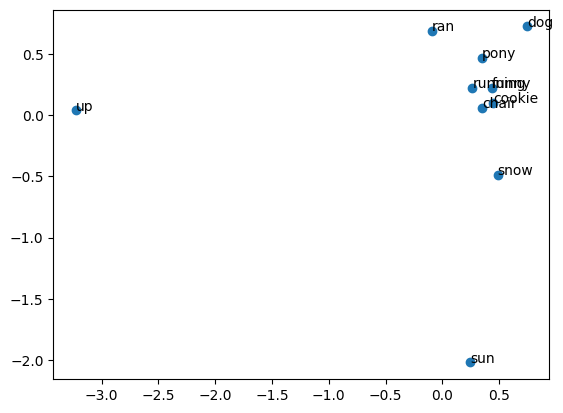

In [17]:
plt.scatter(pca_embs[:, 0], pca_embs[:, 1])
for i, word in enumerate(words):
	plt.annotate(word, xy=(pca_embs[i, 0], pca_embs[i, 1]))
plt.show()

## Part 3 - Design Own Metric

In [18]:
def euclidean_distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

KNN similarity queries the k nearest neighbors to each word and computes the euclidean distance between all combinations of neighbors from words a and b. The distance is weighted by multiplying the similarity between the neighbors and their corresponding query words and summed into a final similarity measure.

This could be more robust than cosine similarity because it considers the similarity between multiple combinations of words. Since it uses euclidean distance, it captures the distance between points instead of the angle. Thus, this metric gives additional information to cosine similarity.

In [19]:
def knn_similarity(a,b,num_neighbors):
  sim = 0
  a_nbrs = model.get_nearest_neighbors(a, k=num_neighbors)
  b_nbrs = model.get_nearest_neighbors(b, k=num_neighbors)

  for i in range(len(a_nbrs)):
    for j in range(len(b_nbrs)):
      sim += euclidean_distance(model.get_word_vector(a_nbrs[i][1]), model.get_word_vector(b_nbrs[j][1])) * b_nbrs[j][0] * a_nbrs[i][0]
  return sim



### Word Similarity in Embedding Space

In [24]:
#similarity_method = "cosine_similarity"
similarity_method = "knn_similarity"

In [32]:
def get_sim_matrix(similarity_method,arr):
  sim = np.empty((len(arr),len(arr)))
  for i in range(len(arr)):
    for j in range(len(arr)):
      sim[i][j] = globals()[similarity_method](arr[i],arr[j],3)
  return sim

In [33]:
sim_mat = None
if(similarity_method == "cosine_similarity"):
  sim_mat = get_sim_matrix(similarity_method,embs)
elif(similarity_method == "knn_similarity"):
  sim_mat = get_sim_matrix(similarity_method,words)


#### Word Similarity Rank Graph

Graphing similarity to word 0, "Pony"

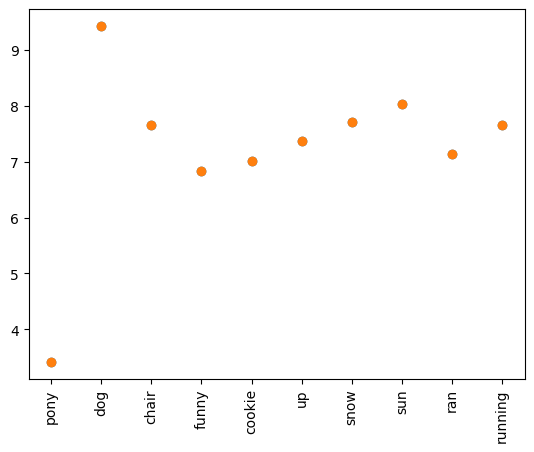

In [36]:
plt.scatter(np.arange(0,len(sim_mat[0]),1),sim_mat[:1, :])
plt.scatter(np.arange(0,len(sim_mat[0]),1),sim_mat[:1, :])
plt.xticks(range(len(words)),words, rotation=90)
plt.show()

### Word Similarity Heatmap

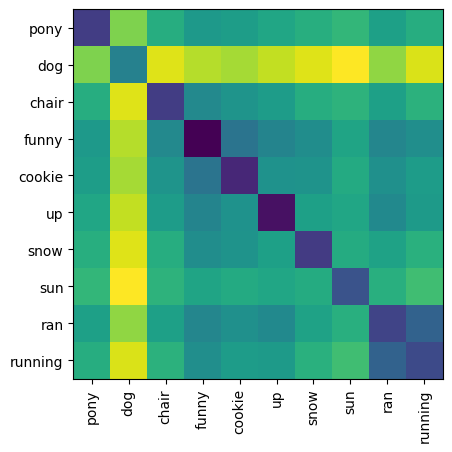

In [34]:
plt.imshow(sim_mat)
plt.xticks(range(len(words)),words, rotation=90)
plt.yticks(range(len(words)), words)
plt.show()

Bojanowski, P., Grave, E., Joulin, A., & Mikolov, T. (2016). Enriching Word Vectors with Subword Information. arXiv preprint arXiv:1607.04606.

Brownlee, J. (2020, September 2). How to develop word embeddings in python with gensim. MachineLearningMastery.com. https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
